In [6]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


In [7]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [8]:
df_stroop = pd.read_csv("data/models/stroop.csv")
df_stroop.head(3)

,Condition,RT
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564


In [10]:
mod_stroop = smf.ols(data = df_stroop, formula = "RT ~ Condition").fit()
mod_stroop.params

Intercept                   14.051125
Condition[T.Incongruent]     7.964792
dtype: float64

In [12]:
df_tips = sns.load_dataset("tips")
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df_tips[['time', 'tip']].groupby("time").mean()

,tip
time,
Lunch,2.728088
Dinner,3.102670


In [17]:
df_housing = pd.read_csv("data/housing.csv")
df_housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

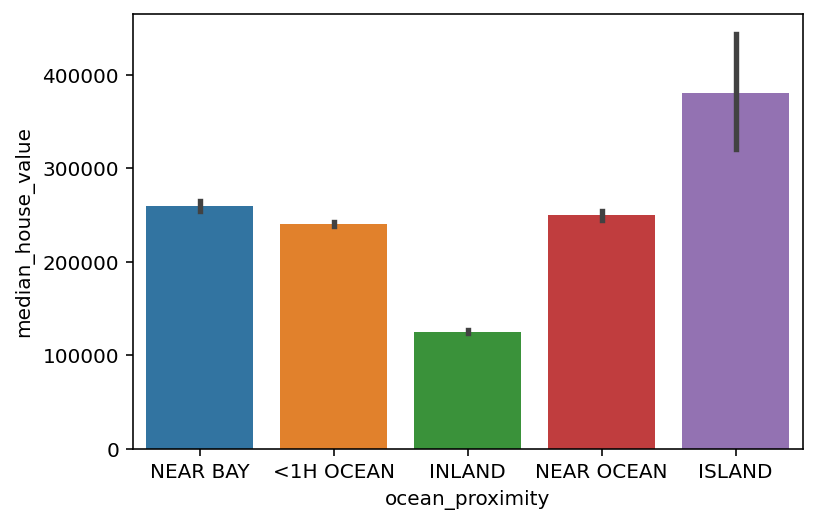

In [19]:
sns.barplot(data = df_housing,
           x = "ocean_proximity",
           y = "median_house_value")

In [21]:
mod_ocean = smf.ols(data = df_housing, 
                     formula = "median_house_value ~ ocean_proximity").fit()
mod_ocean.params

Intercept                        240084.285464
ocean_proximity[T.INLAND]       -115278.893463
ocean_proximity[T.ISLAND]        140355.714536
ocean_proximity[T.NEAR BAY]       19128.026326
ocean_proximity[T.NEAR OCEAN]      9349.691963
dtype: float64

$Y = 240084 - 115278 * X_{inland} + 140355 * X_{island} + 19128 * X_{near bay} + 9349 * X_{near ocean}$

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

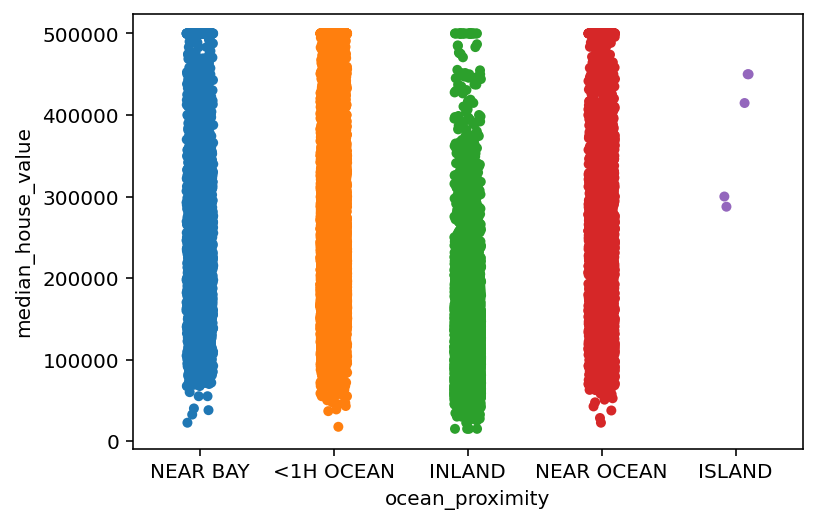

In [33]:
sns.stripplot(data = df_housing,
             x = "ocean_proximity",
             y = "median_house_value")